# Video pipeline with Yolo + Resnet Model

In [1]:
import os
import sys
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from typing import Dict, List
import numpy as np

pp = PrettyPrinter(indent=4)
from barazmoon.twitter import twitter_workload_generator

# get an absolute path to the directory that contains parent files
__file__ = globals()["_dh"][0]
project_dir = __file__ = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..")))

from experiments.utils.constants import FINAL_RESULTS_PATH, FIGURES_PATH
from experiments.utils.parser import AdaptationParser
from experiments.utils.drawing import draw_temporal, draw_cumulative

In [2]:
metaserieses = [24 for _ in range(81)]
serieses = [i for i in range(81)]

series_names = None

series_paths = {
    series: os.path.join(
        FINAL_RESULTS_PATH, "metaseries", str(metaseries), "series", str(series)
    )
    for series, metaseries in zip(serieses, metaserieses)
}

loaders = {
    series: AdaptationParser(
        series_path=series_path, model_name="video", type_of="router_pipeline"
    )
    for series, series_path in series_paths.items()
}

In [3]:
experiment_info = {}
configs = {}
for series, loader in loaders.items():
    configs_exp = loader.load_configs()
    config = configs_exp["0.yaml"]
    configs[series] = config
    experiment_info[series] = config["experiment_info"]
experiment_info

{0: {'models_num': 1, 'tasks_num': 1},
 1: {'models_num': 1, 'tasks_num': 2},
 2: {'models_num': 1, 'tasks_num': 3},
 3: {'models_num': 1, 'tasks_num': 4},
 4: {'models_num': 1, 'tasks_num': 5},
 5: {'models_num': 1, 'tasks_num': 6},
 6: {'models_num': 1, 'tasks_num': 7},
 7: {'models_num': 1, 'tasks_num': 8},
 8: {'models_num': 1, 'tasks_num': 9},
 9: {'models_num': 2, 'tasks_num': 1},
 10: {'models_num': 2, 'tasks_num': 2},
 11: {'models_num': 2, 'tasks_num': 3},
 12: {'models_num': 2, 'tasks_num': 4},
 13: {'models_num': 2, 'tasks_num': 5},
 14: {'models_num': 2, 'tasks_num': 6},
 15: {'models_num': 2, 'tasks_num': 7},
 16: {'models_num': 2, 'tasks_num': 8},
 17: {'models_num': 2, 'tasks_num': 9},
 18: {'models_num': 3, 'tasks_num': 1},
 19: {'models_num': 3, 'tasks_num': 2},
 20: {'models_num': 3, 'tasks_num': 3},
 21: {'models_num': 3, 'tasks_num': 4},
 22: {'models_num': 3, 'tasks_num': 5},
 23: {'models_num': 3, 'tasks_num': 6},
 24: {'models_num': 3, 'tasks_num': 7},
 25: {'mod

In [4]:
adaptation_logs = dict(
    map(lambda l: (l[0], l[1].load_adaptation_log()), loaders.items())
)

In [5]:
adaptation_logs

{0: {'timesteps': {'10': {'duration': 0.016608715057373047},
   '20': {'duration': 0.006508827209472656},
   '30': {'duration': 0.005732059478759766},
   '40': {'duration': 0.005861997604370117},
   '50': {'duration': 0.006168365478515625},
   '60': {'duration': 0.006024599075317383},
   '70': {'duration': 0.006518363952636719},
   '80': {'duration': 0.005784511566162109},
   '90': {'duration': 0.008278369903564453},
   '100': {'duration': 0.0056841373443603516},
   '110': {'duration': 0.006444454193115234},
   '120': {'duration': 0.010162353515625},
   '130': {'duration': 0.007470607757568359},
   '140': {'duration': 0.009907722473144531},
   '150': {'duration': 0.012086629867553711},
   '160': {'duration': 0.009171009063720703},
   '170': {'duration': 0.013869285583496094},
   '180': {'duration': 0.007657766342163086},
   '190': {'duration': 0.011756658554077148}},
  'metadata': {'sla': 5.967587411403655,
   'base_allocations': {'crop': {'yolov5x': 8}},
   'stage_wise_slas': {'crop':

In [6]:
durations = {}
series_changes = {}
for series in serieses:
    series_changes[series] = loaders[series].series_changes_gurobi(
        adaptation_log=adaptation_logs[series]
    )
    durations[series] = sum(series_changes[series]["duration"]) / len(series_changes[series]["duration"])
pp.pprint(durations)

{   0: 0.008510338632684005,
    1: 0.02629263777481882,
    2: 0.02111263024179559,
    3: 0.026463169800607783,
    4: 0.03161222056338662,
    5: 0.04443526268005371,
    6: 0.07930607544748407,
    7: 0.05973297671267861,
    8: 0.0803159287101344,
    9: 0.018328352978355007,
    10: 0.025770225022968492,
    11: 0.04271910065098813,
    12: 0.054068791238885174,
    13: 0.07235589780305561,
    14: 0.08916055528741133,
    15: 0.14008730336239464,
    16: 0.15631531414232755,
    17: 0.2879741317347476,
    18: 0.023886053185713917,
    19: 0.07437892964011744,
    20: 0.06821908448871813,
    21: 0.08475668806778758,
    22: 0.10090427649648566,
    23: 0.14242049267417506,
    24: 0.13834025985316226,
    25: 0.15212587306373998,
    26: 0.16827240743135152,
    27: 0.04217491651836194,
    28: 0.07624055209912751,
    29: 0.12514237353676244,
    30: 0.13450229795355545,
    31: 0.16514229774475098,
    32: 0.2117415101904618,
    33: 0.22201236925627055,
    34: 0.26769314314

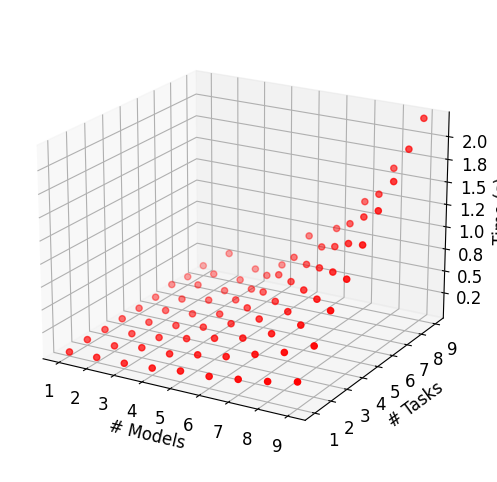

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

# Sample dictionary
data = {}
for key, value in durations.items():
    data[(experiment_info[key]['models_num'], experiment_info[key]['tasks_num'])] = value

# Extract the x, y, and z values from the dictionary
x = [coord[0] for coord in data.keys()]
y = [coord[1] for coord in data.keys()]
z = list(data.values())

# Create the figure and axis with larger size
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(x, y, z, c='r', marker='o')

# Set z-axis limits
ax.set_zlim(min(z), max(z))

# Add labels and title
ax.set_xlabel('# Models')
ax.set_ylabel('# Tasks')
ax.set_zlabel('Time (s)')

# Rotate the plot view
ax.view_init(elev=20, azim=-60)

# Adjust z-axis tick label precision
ax.zaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))

# Display the plot
plt.show()


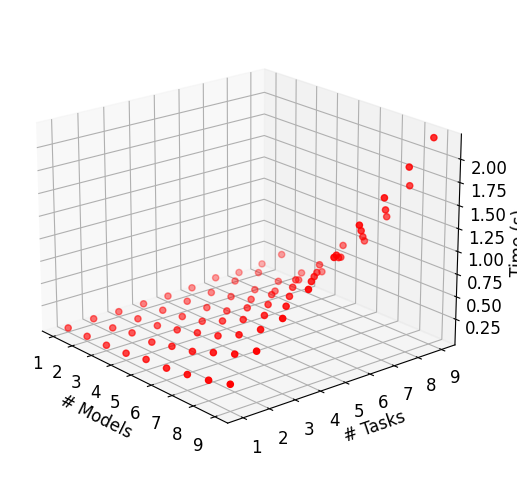

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample dictionary
data = {}
for key, value in durations.items():
    data[(experiment_info[key]['models_num'], experiment_info[key]['tasks_num'])] = value

# Extract the x, y, and z values from the dictionary
x = [coord[0] for coord in data.keys()]
y = [coord[1] for coord in data.keys()]
z = list(data.values())

# Adjust figure size and subplot layout
fig = plt.figure(figsize=(6, 6))
# fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Create the axis
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(x, y, z, c='r', marker='o')

# Set z-axis limits
ax.set_zlim(min(z), max(z))

# Add labels and title
ax.set_xlabel('# Models')
ax.set_ylabel('# Tasks')
ax.set_zlabel('Time (s)')

# Rotate the plot view
ax.view_init(elev=20, azim=-40)

# Add a bold line at y=0.5
ax.axhline(y=0.5, color='black', linewidth=2)

# plt.tight_layout()
# Display the plot
# TODO needed to be cropped manually at the end
plt.savefig(filename=f"{FIGURES_PATH}/.pdf")
